In [9]:
import pandas as pd

# cleaned breeds with relevant features
dog_info = pd.read_csv('dogs_cleaned.csv')
dog_info = dog_info.drop(columns=[
    'Detailed Description Link', 
    'Height',
    "Avg. Height, cm",
    'Weight',
    "Avg. Weight, kg",
    'Life Span', 
    'Potential For Weight Gain', 
    'Drooling Potential',
    'Dog Size',
    'Trainability', 
    'Wanderlust Potential',
    'Intensity',
    'Physical Needs',
    'Sensitivity Level',
    'All Around Friendliness',
    'Health And Grooming Needs',
    'Tolerates Hot Weather',
    'Tolerates Cold Weather']) 

dog_info = pd.get_dummies(dog_info, columns=['Dog Breed Group'], drop_first=True)
dog_info.to_csv('dog_info.csv', index=False)

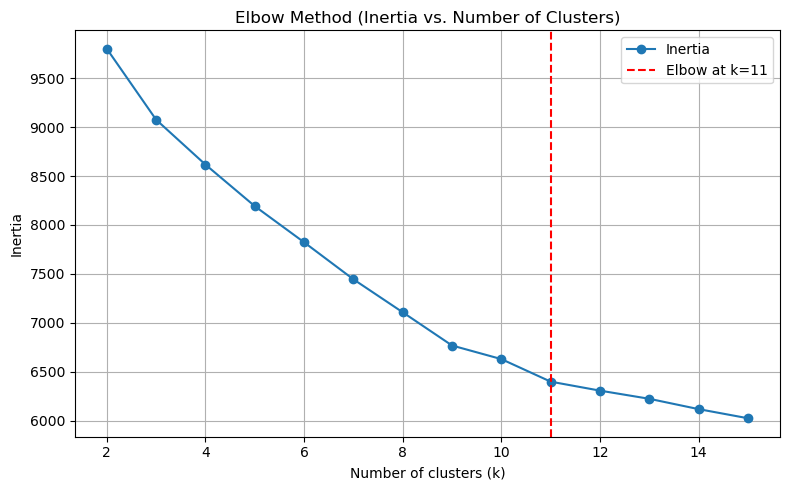

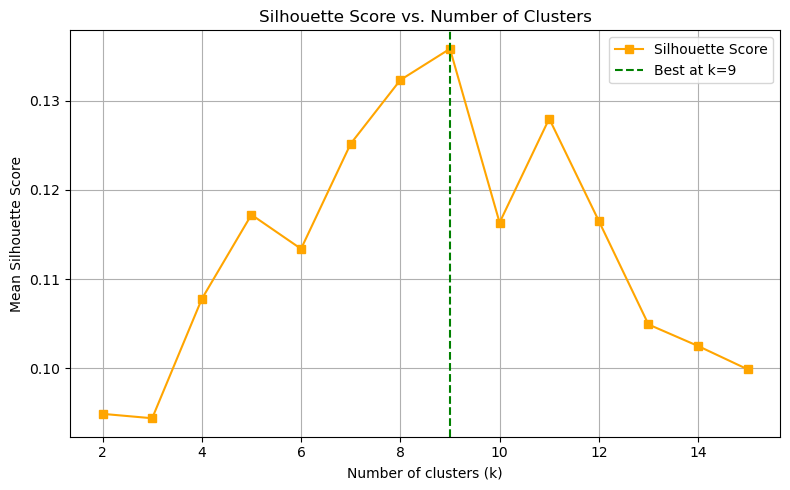

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load and clean the dataset
df = pd.read_csv('dog_info.csv')  # Replace with your path
df_clean = df.dropna()

# Extract breed names and drop non-numeric columns for clustering
breed_names = df_clean[['Breed Name']].copy()
# Drop non-numeric columns for clustering
features = df_clean.drop(columns=['Breed Name'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Run KMeans for multiple values of k
k_values          = range(2, 16)
inertias          = []
silhouette_scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X_scaled)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(X_scaled, labels))

# Identify best k values
inertia_diffs   = np.diff(inertias, 2)
elbow_k_index   = np.argmin(inertia_diffs) + 2
elbow_k         = k_values[elbow_k_index]
best_silhouette_k = k_values[np.argmax(silhouette_scores)]

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', label='Inertia')
plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Elbow at k={elbow_k}')
plt.title('Elbow Method (Inertia vs. Number of Clusters)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', color='orange', label='Silhouette Score')
plt.axvline(x=best_silhouette_k, color='green', linestyle='--', label=f'Best at k={best_silhouette_k}')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Mean Silhouette Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Apply KMeans clustering with k = 9
k = 9
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Create final mapping: breed name → cluster ID
breed_cluster_map = breed_names.copy()
breed_cluster_map['Cluster'] = cluster_labels
breed_cluster_map = breed_cluster_map.sort_values(by='Cluster').reset_index(drop=True)

# Display or export
breed_cluster_map
breed_cluster_map.to_csv('dog_breed_to_cluster_map.csv', index=False)  # Optional: save to file